# ft_linear_regression

Project in which I need to build a linear regression model for a simple dataset.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data = np.genfromtxt('../data.csv', delimiter=',')[1:]
km = data[:, 0]
price = data[:, 1]

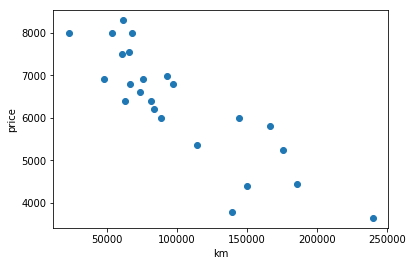

In [4]:
def plot_data():
    plt.scatter(km, price)
    plt.xlabel("km")
    plt.ylabel("price")
plot_data()
plt.show()

This dataset contains information about cars, their cost and the the number of kilometers they've made.

We can see just by looking at the data that their is a **linear relationship**, when the distance made diminish, the price rize.

We can try to trace an approximate line which goes *through* the data.

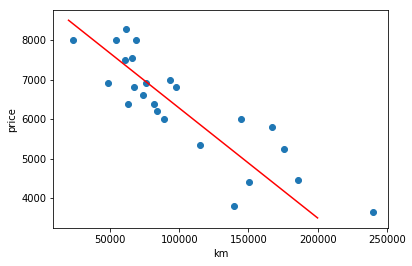

In [5]:
plot_data()
plt.plot([200_000, 20_000], [3_500, 8_500], color='r')
plt.show()

We can use this hypothetical line to predict new data, for example predict the price of a car knowing only it's distance traveled.

The equation of a line is in the form:

$$
\boxed {
    y = \theta_1 x + \theta_0
}
$$

Where $\theta_1$ is the slope of the line and $\theta_0$ the y-intercept. If we managed to tweak those values correctly we can find the best fitting line for our data (or at least very close to it).

If we switch to a function, we get $h(x) = \theta_1 x + \theta_0$, $h$ is our **hypothesis function**.

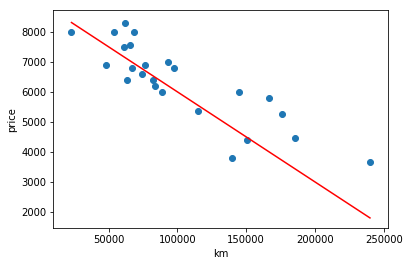

In [6]:
def h(x, theta1, theta0):
    return x * theta1 + theta0

theta1 = -0.03
theta0 = 9000

line_xs = [km.min(), km.max()]
line_ys = [h(x, theta1, theta0) for x in line_xs]
plt.plot(line_xs, line_ys, color='r')

plot_data()
plt.show()

We can adjust our prediction by changing $\theta_1$ and $\theta_0$.

Now, we need a way to know if our line correctly predicts the data or not, so that if not, we can slightly change it to better fit the data.

Introducing the **error function** $J$ (also called cost function):

$$
\begin{align}
J(\theta_1, \theta_0) &= \frac{1}{2n} \sum_{i=1}^{n}(h(x_i) - y_i)^2 \\
                      &= \frac{1}{2n} \sum_{i=1}^{n}((\theta_1 x_i + \theta_0) - y_i)^2
\end{align}
$$

It's the sum of the square of the distance between what we predicted and the actual data.
$n$ is the number of entry we got, we divide by it to normalize the result.

In [7]:
def error_function(xs, ys, theta1, theta0):
    return (1 / (2 * len(xs))) * sum(
        [(h(x, theta1, theta0) - y) ** 2
         for x, y in zip(xs, ys)])

In [8]:
xs = km
ys = price

print(error_function(xs, ys, theta1, theta0))

386217.6189791666


The error value is pretty high, this means that the approximated line is garbage.

The process of learning will be done by reducing this error function. To make that happen, we need to know *how* we are going to change $\theta_1$ and $\theta_0$.

Here comes partial derivatives:

$$
\begin{align}
    \theta_1 &:= \theta_1 - \alpha \frac{\partial}{\partial \theta_1} J(\theta_1, \theta_0) \\
    \theta_0 &:= \theta_0 - \alpha \frac{\partial}{\partial \theta_0} J(\theta_1, \theta_0)
\end{align}
$$

First of all $\alpha$ is the **learning rate** we multiply the change we want to make by it, it describes how *fast* we are changing the hypothesis component.

The partial derivative of $J$ by regard to $\theta_1$ for example is how the error function changes if we consider $\theta_0$ has a constant.

We compute the *next* $\theta_0$ by subtracting learning rate * partial derivative from it.

Lets expand theses partial derivatives:

$$
\newcommand{\partialthetazero}{\frac{\partial}{\partial \theta_0}}
\begin{align}
    &  \partialthetazero \left[ J(\theta_1, \theta_0) \right] \\
    =& \partialthetazero \left[ \frac{1}{2n} \sum_{i=1}^{n}((\theta_1 x_i + \theta_0) - y_i)^2 \right] \\
    =& \frac{1}{2n} \sum_{i=1}^{n} \partialthetazero \left[ ((\theta_1 x_i + \theta_0) - y_i)^2 \right] \\
    =& \frac{1}{2n} \sum_{i=1}^{n} 2((\theta_1 x_i + \theta_0) - y_i) \partialthetazero \left[ ((\theta_1 x_i + \theta_0) - y_i) \right] \\
    =& \boxed{ \frac{1}{n} \sum_{i=1}^{n} ((\theta_1 x_i + \theta_0) - y_i) }
\end{align}
$$

And for $\theta_1$:

$$
\newcommand{\partialthetaone}{\frac{\partial}{\partial \theta_1}}
\begin{align}
    &  \partialthetaone \left[ J(\theta_1, \theta_0) \right] \\
    =& \partialthetaone \left[ \frac{1}{2n} \sum_{i=1}^{n}((\theta_1 x_i + \theta_0) - y_i)^2 \right] \\
    =& \frac{1}{2n} \sum_{i=1}^{n} \partialthetaone \left[ ((\theta_1 x_i + \theta_0) - y_i)^2 \right] \\
    =& \frac{1}{2n} \sum_{i=1}^{n} 2((\theta_1 x_i + \theta_0) - y_i) \partialthetaone \left[ ((\theta_1 x_i + \theta_0) - y_i) \right] \\
    =& \boxed { \frac{1}{n} \sum_{i=1}^{n} ((\theta_1 x_i + \theta_0) - y_i) x_i }
\end{align}
$$

In [9]:
def theta0_partial(xs, ys, theta1, theta0):
    return sum([h(x, theta1, theta0) - y
                for x, y in zip(xs, ys)]) / len(xs)

def theta1_partial(xs, ys, theta1, theta0):
    return sum([(h(x, theta1, theta0) - y) * x
                for x, y in zip(xs, ys)]) / len(xs)


def gradient_descent(xs, ys, theta1, theta0, alpha, iterations):
    for _ in range(iterations):
        next_theta1 = theta1 - alpha * theta1_partial(xs, ys, theta1, theta0)
        next_theta0 = theta0 - alpha * theta0_partial(xs, ys, theta1, theta0)
        theta1 = next_theta1
        theta0 = next_theta0
    return theta1, theta0


The gradient descent work by repeating the formula above a certain amount of times.

But before actually running the algorithm, the data need to be normalized. This means that they will be in a range like 0 < x < 1 but they will keep their relative distance to each other.

If we don't do this, our values will go to infinity or some do some sneaky floating point arithmetic stuff.

Here is how we normalize:

$$
X_{normalized} = \frac{X - X_{min}}{X_{max} - X_{min}}
$$

In [36]:
#from sklearn.preprocessing import normalize
#X, Y = normalize([xs, ys])

def normalize(x):
    return (x - x.min()) / (x.max() - x.min())

def denormalize(x, x_ref):
    return x * (x_ref.max() - x_ref.min()) + x_ref.min()

X = normalize(xs)
Y = normalize(ys)

print(X)
print(denormalize(X, xs))

[1.         0.53846366 0.58774948 0.74910295 0.70520633 0.42330989
 0.66282974 0.30447119 0.56011257 0.28144044 0.27236171 0.18498763
 0.23537893 0.34362347 0.20313587 0.24470638 0.11670144 0.3228958
 0.17526405 0.19702811 0.1432559  0.21004509 0.         0.17913321]
[240000. 139800. 150500. 185530. 176000. 114800. 166800.  89000. 144500.
  84000.  82029.  63060.  74000.  97500.  67000.  76025.  48235.  93000.
  60949.  65674.  54000.  68500.  22899.  61789.]


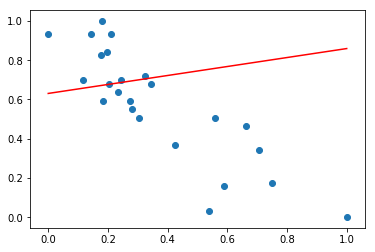

In [21]:
theta1, theta0 = np.random.random(2)

line_xs = [X.min(), X.max()]
line_ys = [h(x, theta1, theta0) for x in line_xs]
plt.plot(line_xs, line_ys, color='r')

plt.scatter(X, Y)
plt.show()

In [22]:
print("error before: ", error_function(X, Y, theta1, theta0))

error before:  0.06228371667961022


In [28]:
alpha = 0.1
iterations = 20000

theta1, theta0 = gradient_descent(X, Y, theta1, theta0, alpha, iterations)

print(theta1, theta0)
print("error after: ", error_function(X, Y, theta1, theta0))

-1.0035757423970153 0.9393189294497459
error after:  0.010349594165039607


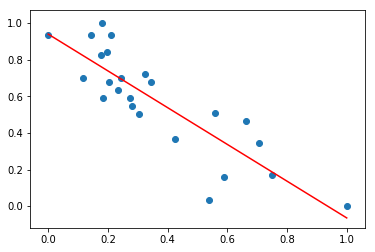

In [29]:
line_xs = [X.min(), X.max()]
line_ys = [h(x, theta1, theta0) for x in line_xs]
plt.plot(line_xs, line_ys, color='r')

plt.scatter(X, Y)
plt.show()

In [33]:
#t1 = theta1 * (xs.max() - xs.min()) + xs.min()
#t0 = theta0 * (xs.max() - xs.min()) + xs.min()

#print(t1, t0)

t1 = denormalize(theta1, )
print(h(50_000, theta1, theta0))

-1.0035757423970153 0.9393189294497459
-50177.847800921314
